# Project 2: Using Pandas to Analyze Baby Name Data 

### Nicholas Colan | UB: 5014 2568
#### 03/15/23 | MTH 448

In [1]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import matplotlib.widgets as widgets

## Introduction

The United States Social Securiy Administration (SSA) is a federal agency of the United States that administers Social Security, a social program that is designed to aid retired and disabled citizens of the United States. The Social Security Administration webpage, https://www.ssa.gov/oact/babynames/limits.html, provides a large amount of data on babies born in the United States. This data includes the year the baby was born, the babies' name, sex, and the state the baby was born in. The data includes all babies born in the United States from the years 1880-2021. In this project we will download and load this data into a `pandas.DataFrame`, formatted in a way in which we can perform data analysis on all of the registered baby names from 1880-present day.

Once we have this data properly loaded into a `pandas.DataFrame`, we will explore several questions about given baby names in the United States. We will first look at the amount of name diversity in the United States during this time period, i.e. the amount of unique names given to babies in every year, and try to explain trends in that data.

After that, we will explore what the top 10 most popular baby names given to both male and females were, and try to explain why certain names were most popular.

Last, we will look at 'dissappeared' names, i.e. names that were used throughout the 1800's that never have been used again in the 21st century.

### Pulling the data for nation-wide and state-wide baby names

In this project we will both explore trends in the national data for baby names as well as state-level data. We have already downloaded and un-zipped the files necessary for this data analysis found at the SSA website, `names.zip` and `namesbystate.zip`. They are provided with this project. We will now used these two functions, `load_names_data_into_dataframe()` and `load_state_names_data_into_dataframe()` in order to put the data into `pandas.Dataframes`.

In [2]:
# Extract nation-wide names data

def load_names_data_into_dataframe(folder_name):

    file_names = glob.glob(folder_name+"/yob*.txt")
    years = [ int(f[-8:-4]) for f in file_names]
    list_of_frames = [pd.read_csv(f, names=["name", "sex", "count"]) for f in file_names]
    df = pd.concat(list_of_frames,keys=years)
    df = df.reset_index(level=0)
    df = df.rename({'level_0':'year'},axis=1)
    df = df.sort_values(by=['year','name'])

    return df

In [3]:
# Extract state-wide names data

def load_state_names_data_into_dataframe(folder_name):
    
    file_namesbystate = glob.glob(folder_name+"/*.TXT")
    list_of_frames_namesbystate = [pd.read_csv(f, names=["state", "sex", "year", "name","count"]) for f in file_namesbystate]
    df_namesbystate = pd.concat(list_of_frames_namesbystate)
    df_namesbystate = df_namesbystate.sort_values(by=['state','year'])
    
    return df_namesbystate

## **Name diversity** 
We will first explore how many unique baby names were given to babies born anywhere in the United States from the year 1880-2021.

In [4]:
fileName1 = 'ncolan_names'
df_nationNames = load_names_data_into_dataframe(fileName1)

In [5]:
# Groups the data by year and counts the number of unique names for each year using the `.nunique()` function

df_a = df_nationNames.groupby('year')['name'].nunique().reset_index()
df_a = df_a.rename(columns={'name':'# of different names'})

In [6]:
years = df_a['year'] # Extract the 'year' column from df_a and assign it to a new variable years
diff_names = df_a['# of different names'] # Extract the '# of different names' column from df_a and assigns it to a new variable diff_names

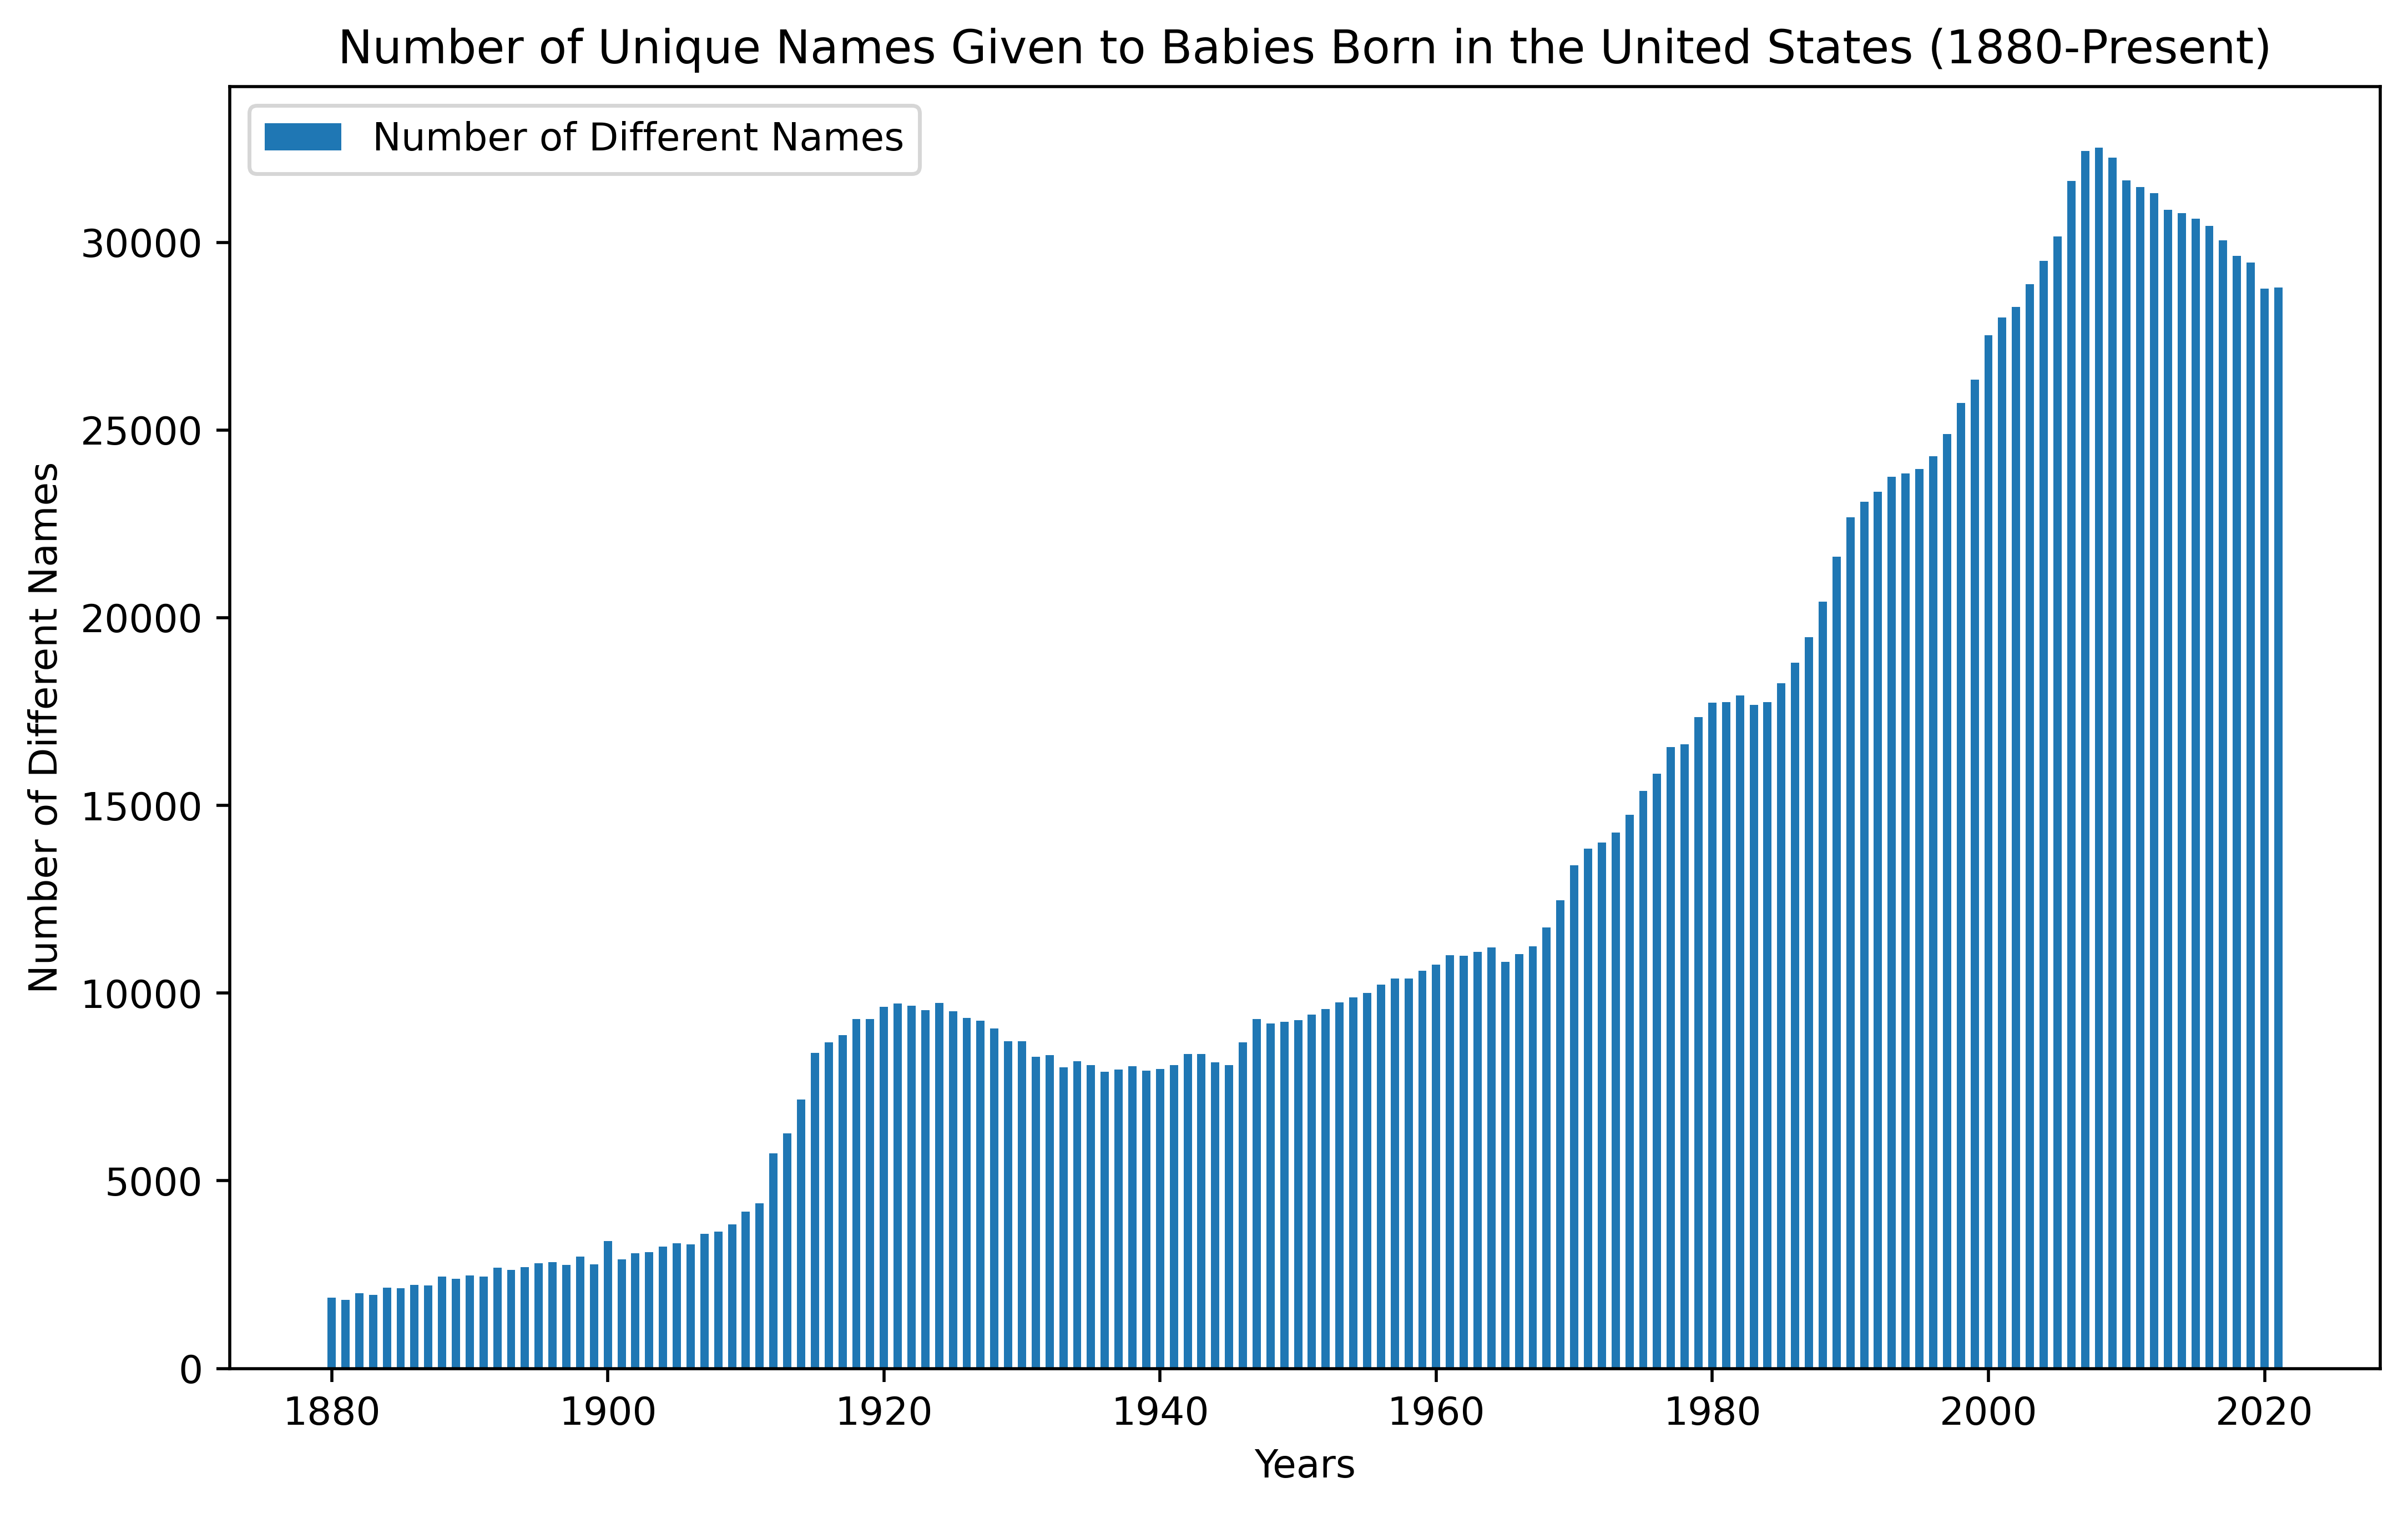

In [7]:
plt.figure(figsize=(10,6),dpi=500) # Need high dpi so that whitespace is properly shown
plt.bar(years,diff_names,label='Number of Different Names',width = 0.6)
plt.title('Number of Unique Names Given to Babies Born in the United States (1880-Present)')
plt.xlabel('Years')
plt.ylabel('Number of Different Names')
plt.legend()

As we can see, the amount of unique baby names given to babies born in the United States has steadily grown from the 19th century to the beginning of the 21st century. This can be explained by the growing population in the United States over this time period as well as a large amount of immigrants who moved to the United States during this time period.

## How does this differ state by state?

In [8]:
folder_name2 = 'ncolan_namesbystate'
df_namesbystate = load_state_names_data_into_dataframe(folder_name2)

<IPython.core.display.Javascript object>


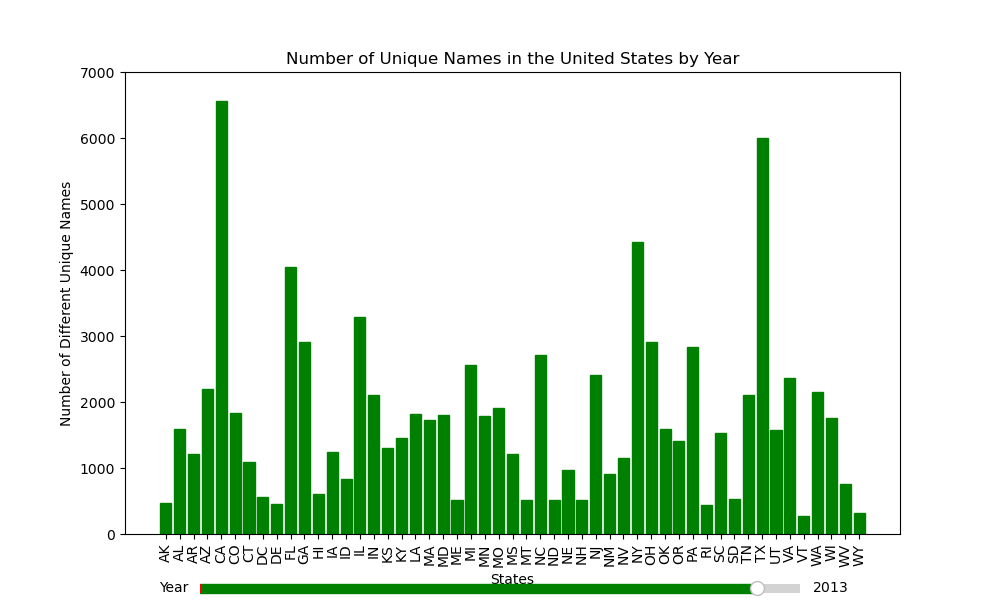

In [9]:
%matplotlib notebook
def get_unique_names_by_state(year, df):
    df_year = df[df['year'] == year] # Select only the rows in the df corresponding to the specified year
    unique_names_by_state = df_year.groupby('state')['name'].nunique() #Group the data by state, and calculates the number of unique baby names for each state
    return unique_names_by_state

def update_graph(val): # Called every time the slider is changed
    year = int(year_slider.val) # Get current value of slider, change to int to properly find data
    unique_names_by_state = get_unique_names_by_state(year, df_namesbystate)
    for i, name_count in enumerate(unique_names_by_state.values): # Updates the bar chart on the graph with the new values.
        bar_chart[i].set_height(name_count)
        bar_chart[i].set_color('green')
        # Update the display of a Figure object in an interactive environment after changes have been made to the figure's properties.
        # This will only change parts of the figure that have been updated
    fig.canvas.draw_idle()

    
first_year = df_namesbystate.sort_values(by='year').iloc[0]['year']
last_year = df_namesbystate.sort_values(by='year').iloc[-1]['year']

unique_names_by_state = get_unique_names_by_state(first_year, df_namesbystate)

fig, ax = plt.subplots(figsize=(10,6))
ax.set_ylim([0,7000])
bar_chart = ax.bar(unique_names_by_state.index, unique_names_by_state.values,color='green')
ax.set_xlabel('States')
ax.set_ylabel('Number of Different Unique Names')
plt.title('Number of Unique Names in the United States by Year')
plt.xticks(rotation=90)

slider_ax = plt.axes([0.2, 0.005, 0.6, 0.03]) # Coordinates of the slider widget
# Seeting up the slider widget, with min and max values of slider, initial value, color, and valstep
# We want valstep = 1 so that we can look at every year, and only look at integer values because dataset 
# contains int values not floats
year_slider = widgets.Slider(slider_ax, 'Year', first_year, last_year, valinit=first_year, valstep=1,color='green')

year_slider.on_changed(update_graph) # Call update() everytime slider is adjusted
plt.subplots_adjust(hspace=0.5) # Vertical spacing for slider
plt.show()

## For males:

<IPython.core.display.Javascript object>


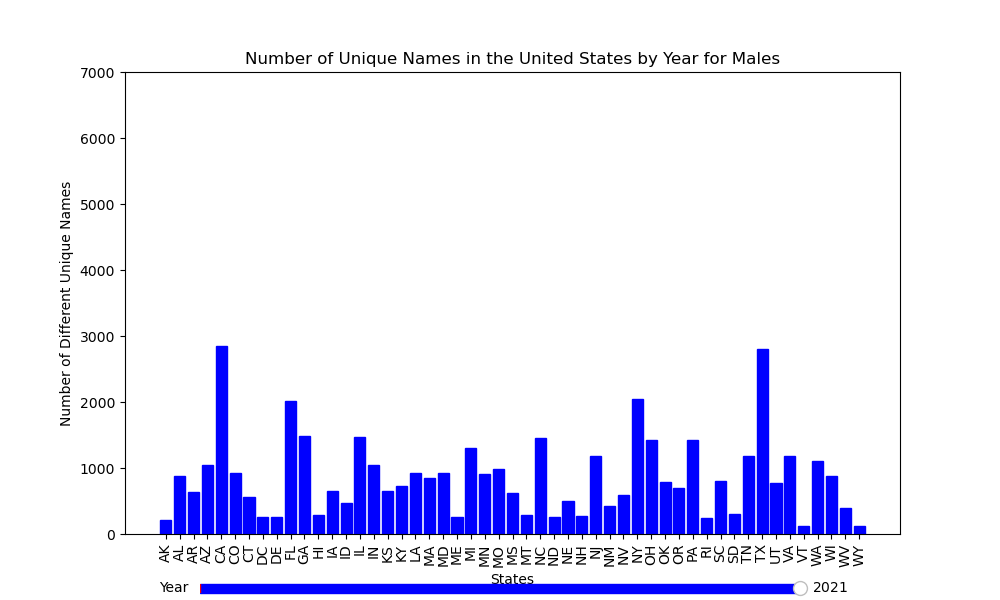

In [10]:
%matplotlib notebook
def get_unique_names_by_state(year, df):
    # Select only the rows in the df corresponding to the specified year and sex
    df_year = df[(df['year'] == year) & (df['sex']=='M')] 
    unique_names_by_state = df_year.groupby('state')['name'].nunique()
    return unique_names_by_state

def update_graph(val):
    year = int(year_slider.val)
    unique_names_by_state = get_unique_names_by_state(year, df_namesbystate)
    for i, name_count in enumerate(unique_names_by_state.values):
        bar_chart[i].set_height(name_count)
        bar_chart[i].set_color('blue')
    fig.canvas.draw_idle()

    
first_year = df_namesbystate.sort_values(by='year').iloc[0]['year']
last_year = df_namesbystate.sort_values(by='year').iloc[-1]['year']

unique_names_by_state = get_unique_names_by_state(first_year, df_namesbystate)

fig, ax = plt.subplots(figsize=(10,6))
ax.set_ylim([0,7000])
bar_chart = ax.bar(unique_names_by_state.index, unique_names_by_state.values,color='blue')
ax.set_xlabel('States')
ax.set_ylabel('Number of Different Unique Names')
plt.title('Number of Unique Names in the United States by Year for Males')
plt.xticks(rotation=90)

slider_ax = plt.axes([0.2, 0.005, 0.6, 0.03])
year_slider = widgets.Slider(slider_ax, 'Year', first_year, last_year, valinit=first_year, valstep=1,color='blue')

year_slider.on_changed(update_graph)
plt.subplots_adjust(hspace=0.5)
plt.show()

## For females:

<IPython.core.display.Javascript object>


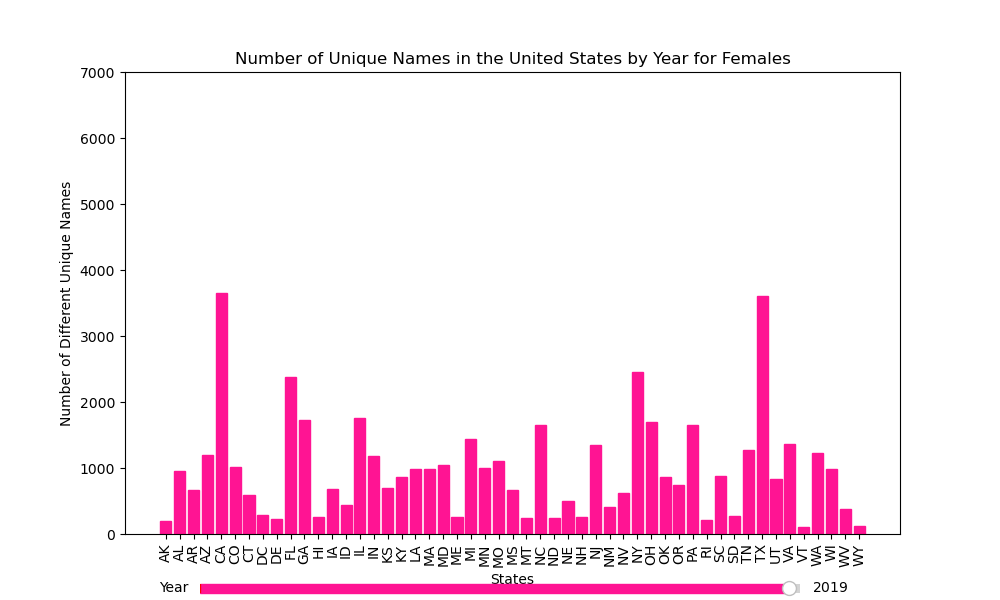

In [11]:
%matplotlib notebook
def get_unique_names_by_state(year, df):
    df_year = df[(df['year'] == year) & (df['sex']=='F')]
    unique_names_by_state = df_year.groupby('state')['name'].nunique()
    return unique_names_by_state

def update_graph(val):
    year = int(year_slider.val)
    unique_names_by_state = get_unique_names_by_state(year, df_namesbystate)
    for i, name_count in enumerate(unique_names_by_state.values):
        bar_chart[i].set_height(name_count)
        bar_chart[i].set_color('deeppink')
    fig.canvas.draw_idle()

    
first_year = df_namesbystate.sort_values(by='year').iloc[0]['year']
last_year = df_namesbystate.sort_values(by='year').iloc[-1]['year']

unique_names_by_state = get_unique_names_by_state(first_year, df_namesbystate)

fig, ax = plt.subplots(figsize=(10,6))
ax.set_ylim([0,7000])
bar_chart = ax.bar(unique_names_by_state.index, unique_names_by_state.values,color='deeppink')
ax.set_xlabel('States')
ax.set_ylabel('Number of Different Unique Names')
plt.title('Number of Unique Names in the United States by Year for Females')
plt.xticks(rotation=90)

slider_ax = plt.axes([0.2, 0.005, 0.6, 0.03])
year_slider = widgets.Slider(slider_ax, 'Year', first_year, last_year, valinit=first_year, valstep=1,color='deeppink')

year_slider.on_changed(update_graph)
plt.subplots_adjust(hspace=0.5)
plt.show()

Looking at only the state-wide data we can see that there are similiar trends to the nation-wide data. The growing population of the United States led to an increasing number of unique baby names. We can also see that the states California, New York, and Texas have had the most amount of unique baby names throughout the data set. This can be explained by these states having the larger populations compared to the other states.

## Top Ten Most Popular Names

Now we will look at the 10 most popular names given to boys and girls in the United States nation-wide, year by year. 

<IPython.core.display.Javascript object>


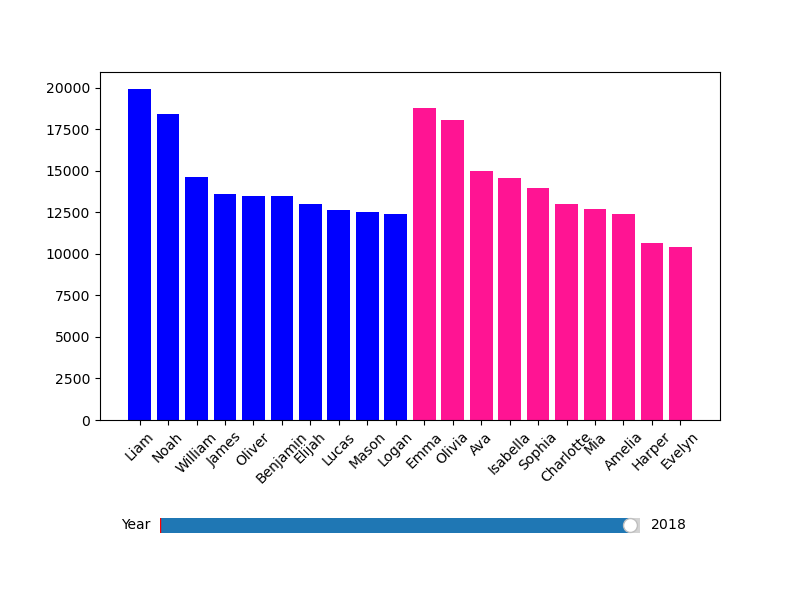

In [12]:
def top_ten_names_by_sex(df,sex,year):
    # Filter the df by the year parameter and then filter the resulting df by the sex parameter.
    filtered_df = df[df['year'] == year]
    # Group the DataFrame by name and sums the count for each name. 
    # Sort the resulting DataFrame by count in descending order and return the top ten names.
    names_df = filtered_df[filtered_df['sex'] == sex].groupby(['name']).sum().sort_values(by=['count'], ascending=False)
    top_ten = names_df[:10]
    return top_ten

def update(val): # Called everytime slider is changed
    ax.clear() # Clear current axes so that new data can be plotted
    year = int(year_slider.val)
    male_names = top_ten_names_by_sex(df_nationNames,'M',year)
    female_names = top_ten_names_by_sex(df_nationNames,'F',year)
 
    ax.tick_params(axis='x', labelrotation=45) # The xticks NEED to be rotated before their values are defined
    # If xtick rotation is defined after its values are generated, they will not rotate
    male_bars = ax.bar(male_names.index, male_names['count'],color='blue',label='M')
    female_bars = ax.bar(female_names.index, female_names['count'],color='deeppink',label='F')
    male_bars.set_height(male_names['count'])
    female_bars.set_height(female_names['count'])

#---------------------------------------------------------

first_year = df_nationNames.sort_values(by='year').iloc[0]['year']
last_year = df_nationNames.sort_values(by='year').iloc[-1]['year']
gender_colors = {'M': 'blue', 'F': 'deeppink'}
# These will be the inital values graphed, we will initialize at the year 1880
male_names = top_ten_names_by_sex(df_nationNames,'M',1880)
female_names = top_ten_names_by_sex(df_nationNames,'F',1880)

# Plot the bar chart
fig,ax = plt.subplots(figsize=(8,6))
plt.subplots_adjust(bottom=0.3)

male_bars = ax.bar(male_names.index, male_names['count'],color='blue',label='Male')
female_bars = ax.bar(female_names.index, female_names['count'],color='deeppink',label='Female')
plt.xticks(rotation=45)
ax.set_xlabel('Name')
ax.set_ylabel('Count')
ax.set_title(f'Top 10 Names for Males and Females')
ax.legend()

slider_ax = plt.axes([0.2,0.1,0.6,0.05])
year_slider = widgets.Slider(slider_ax, 'Year', first_year, last_year, valstep=1,valinit=first_year)

year_slider.on_changed(update)
plt.show()

By using this chart, we can see that the name `John` was consistently one of the most popular names for boys from 1880 until the mid to late 1900's. This can be explained in part by John being a major figure in `Christianity`, which has been one of the main religions practiced by citizens of the United States. This trend could also possibly be explained by the actor `John Wayne`, one of the most famous actors of all time and one of the top box office attractions for over 30 years. His personality and acting style made him an American icon for decades, and must have inspired many to name their children after him.

For females, we can see that from the start of the data in the 1880's until around the 1960's that `Mary` was consistently the most popular name given to female babies born in the United States. Similar to `John`, the name `Mary` has heavy ties to `Christianity` which undoubtedly played a major influence in the amount of babies named `Mary`. 

After the start of the 21st century, we can see a lot of shifting in the most popular names given to babies on a year to year basis. In the last ten years however, `Noah` and `Liam` and `Emma` and `Olivia` have been the top names given to males and females, respectively.

The names `Liam` and `Noah` could have rose to prominice due to the emergence of award winning actors such as Liam Neeson, and the role of `Noah` that actor `Ryan Gosling` in the movie `The Notebook`. Both of these actors and movies have played a huge role in the culture of America in the 21st century. These names also have religious origins, which could explain their popularity. Actresses such as `Emma Watson` and artists such as `Olivia Newton-John` may have also had an influence on female baby names in the last 10 years.

## Disappeared Names: What names that were used in the late 1800's no longer are used in the 21st century?

We will now explore 'dissappeared' names, i.e. names that were used in the late 1800's that no longer are used today. We will mostly try to illustrate names that had some sort of popularity, albeit small, to see if there are any names that were maybe rare to see in the 1800's that are never used today.

In [13]:
# Select only the data from 1880 to 1899 using boolean indexing
df_1800s = df_nationNames[(df_nationNames['year'] >= 1880) & (df_nationNames['year'] <= 1899)]

# Group the data by name and compute the total count for each name across all years
total_counts = df_1800s.groupby('name').sum()['count']

# Select only names that had a higher total count in the 1800s, we want to exclude completely random names 
# that maybe only 5 people in the entire country had
high_counts = total_counts[total_counts >= 1000]

# Select only the data from 2000 to 2021
df_2000s = df_nationNames[(df_nationNames['year'] >= 2000) & (df_nationNames['year'] <= 2021)]

# Group the data by name and compute the total count for each name across all years
total_counts_2000s = df_2000s.groupby('name').sum()['count']

# Find the names that were popular in the 1800s but have not been commonly used since 2000 using a negation Boolean mask
disappeared_names = high_counts[~high_counts.index.isin(total_counts_2000s.index)]

print(disappeared_names.index.tolist())

['Blanch', 'Floy', 'Gussie', 'Hulda', 'Mittie', 'Myrtie', 'Nannie', 'Virgie']


We can see that the names `Nannie` and `Virgie` were two names from the late 1800's that were very seldom used, and no longer have been used as baby names in the 21st century.

## How many people were named this in the 1800's?

In [14]:
disappeared_counts = df_1800s[df_1800s['name'].isin(disappeared_names.index)].groupby('name').sum()['count']

# Sum up the disappeared counts to get the total number of people named one of the disappeared names in the 1800s
total_disappeared_count = disappeared_counts.sum()

# Print the total number of people named one of the disappeared names in the 1800s
print("Total number of people named one of the disappeared names in the 1800s:", total_disappeared_count)

Total number of people named one of the disappeared names in the 1800s: 19260


As we can see, 6,764 people were named 'Nannie' from 1880-1899, or approximately 356 per year. What percentage of babies in the 1800's were named this?

In [15]:
total_babies = df_1800s['count'].sum()
print(total_babies)
(total_disappeared_count / total_babies)*100

5770606


0.33376044041128433

We can see that the names `Blanch`, `Floy`, `Gussie`, `Hulda`, `Mittie`, `Myrtie`, `Nannie`, and `Virgie` were very seldom used names, with only `19,260` out of `5,770,606` babies born between 1880-1899 given this name.

## Conclusion

The SSA website provides some great data about all of the baby names given to babies from the last 140+ years. With this data we are able to make many insights, and see how baby names have changed throughout the last couple centuries. 

We explored the amount of unique baby names given in the entire United States, and found that the amount of unique baby names increased over time for both males and females. This can be explained by the rising population in the United States, which should lead to a greater diversity in names.

We then explored the top ten most common names for boys and girls in the United States for every year between 1880-2021. We found that the name `John` and `Mary` were the top names given to boys and girls from 1880 until arond the 1960's-1970's. These two names have strong religious origins, and have had many prominent people named `John` and `Mary` which probably led to more people naming their children those names. In  more recent years we found that the names `Liam` and `Noah` for boys, and `Emma` and `Olivia` for girls, have been the most popular names. These names have religious origins as well as having many famous people named these names as well.

Lastly, we tried to see what names appeared in the late 1800's that no longer are given to children. Some examples of these names include `Nannie`, `Blanch`, and `Floy`. The unpleaseant sound of these names may be a leading factor in why they are no longer used.

## Code

In [ ]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import matplotlib.widgets as widgets

### Load Data into dataframe

In [ ]:
# Extract nation-wide names data

def load_names_data_into_dataframe(folder_name):

    file_names = glob.glob(folder_name+"/yob*.txt")
    years = [ int(f[-8:-4]) for f in file_names]
    list_of_frames = [pd.read_csv(f, names=["name", "sex", "count"]) for f in file_names]
    df = pd.concat(list_of_frames,keys=years)
    df = df.reset_index(level=0)
    df = df.rename({'level_0':'year'},axis=1)
    df = df.sort_values(by=['year','name'])

    return df

# Extract state-wide names data

def load_state_names_data_into_dataframe(folder_name):
    
    file_namesbystate = glob.glob(folder_name+"/*.TXT")
    list_of_frames_namesbystate = [pd.read_csv(f, names=["state", "sex", "year", "name","count"]) for f in file_namesbystate]
    df_namesbystate = pd.concat(list_of_frames_namesbystate)
    df_namesbystate = df_namesbystate.sort_values(by=['state','year'])
    
    return df_namesbystate

### Name Diversity

In [ ]:
fileName1 = 'names'
df_nationNames = load_names_data_into_dataframe(fileName1)

# Groups the data by year and counts the number of unique names for each year using the `.nunique()` function

df_a = df_nationNames.groupby('year')['name'].nunique().reset_index()
df_a = df_a.rename(columns={'name':'# of different names'})

years = df_a['year'] # Extract the 'year' column from df_a and assign it to a new variable years
diff_names = df_a['# of different names'] # Extract the '# of different names' column from df_a and assigns it to a new variable diff_names

plt.figure(figsize=(10,6),dpi=500) # Need high dpi so that whitespace is properly shown
plt.bar(years,diff_names,label='Number of Different Names',width = 0.6)
plt.title('Number of Unique Names Given to Babies Born in the United States (1880-Present)')
plt.xlabel('Years')
plt.ylabel('Number of Different Names')
plt.legend()

### Name Diversity By State

In [ ]:
folder_name2 = 'namesbystate'
df_namesbystate = load_state_names_data_into_dataframe(folder_name2)

%matplotlib notebook
def get_unique_names_by_state(year, df):
    df_year = df[df['year'] == year] # Select only the rows in the df corresponding to the specified year
    unique_names_by_state = df_year.groupby('state')['name'].nunique() #Group the data by state, and calculates the number of unique baby names for each state
    return unique_names_by_state

def update_graph(val): # Called every time the slider is changed
    year = int(year_slider.val) # Get current value of slider, change to int to properly find data
    unique_names_by_state = get_unique_names_by_state(year, df_namesbystate)
    for i, name_count in enumerate(unique_names_by_state.values): # Updates the bar chart on the graph with the new values.
        bar_chart[i].set_height(name_count)
        bar_chart[i].set_color('green')
        # Update the display of a Figure object in an interactive environment after changes have been made to the figure's properties.
        # This will only change parts of the figure that have been updated
    fig.canvas.draw_idle()

    
first_year = df_namesbystate.sort_values(by='year').iloc[0]['year']
last_year = df_namesbystate.sort_values(by='year').iloc[-1]['year']

unique_names_by_state = get_unique_names_by_state(first_year, df_namesbystate)

fig, ax = plt.subplots(figsize=(10,6))
ax.set_ylim([0,7000])
bar_chart = ax.bar(unique_names_by_state.index, unique_names_by_state.values,color='green')
ax.set_xlabel('States')
ax.set_ylabel('Number of Different Unique Names')
plt.title('Number of Unique Names in the United States by Year')
plt.xticks(rotation=90)

slider_ax = plt.axes([0.2, 0.005, 0.6, 0.03]) # Coordinates of the slider widget
# Seeting up the slider widget, with min and max values of slider, initial value, color, and valstep
# We want valstep = 1 so that we can look at every year, and only look at integer values because dataset 
# contains int values not floats
year_slider = widgets.Slider(slider_ax, 'Year', first_year, last_year, valinit=first_year, valstep=1,color='green')

year_slider.on_changed(update_graph) # Call update() everytime slider is adjusted
plt.subplots_adjust(hspace=0.5) # Vertical spacing for slider
plt.show()

### Males Only

In [ ]:
%matplotlib notebook
def get_unique_names_by_state(year, df):
    # Select only the rows in the df corresponding to the specified year and sex
    df_year = df[(df['year'] == year) & (df['sex']=='M')] 
    unique_names_by_state = df_year.groupby('state')['name'].nunique()
    return unique_names_by_state

def update_graph(val):
    year = int(year_slider.val)
    unique_names_by_state = get_unique_names_by_state(year, df_namesbystate)
    for i, name_count in enumerate(unique_names_by_state.values):
        bar_chart[i].set_height(name_count)
        bar_chart[i].set_color('blue')
    fig.canvas.draw_idle()

    
first_year = df_namesbystate.sort_values(by='year').iloc[0]['year']
last_year = df_namesbystate.sort_values(by='year').iloc[-1]['year']

unique_names_by_state = get_unique_names_by_state(first_year, df_namesbystate)

fig, ax = plt.subplots(figsize=(10,6))
ax.set_ylim([0,7000])
bar_chart = ax.bar(unique_names_by_state.index, unique_names_by_state.values,color='blue')
ax.set_xlabel('States')
ax.set_ylabel('Number of Different Unique Names')
plt.title('Number of Unique Names in the United States by Year for Males')
plt.xticks(rotation=90)

slider_ax = plt.axes([0.2, 0.005, 0.6, 0.03])
year_slider = widgets.Slider(slider_ax, 'Year', first_year, last_year, valinit=first_year, valstep=1,color='blue')

year_slider.on_changed(update_graph)
plt.subplots_adjust(hspace=0.5)
plt.show()

### Females Only

In [ ]:
%matplotlib notebook
def get_unique_names_by_state(year, df):
    df_year = df[(df['year'] == year) & (df['sex']=='F')]
    unique_names_by_state = df_year.groupby('state')['name'].nunique()
    return unique_names_by_state

def update_graph(val):
    year = int(year_slider.val)
    unique_names_by_state = get_unique_names_by_state(year, df_namesbystate)
    for i, name_count in enumerate(unique_names_by_state.values):
        bar_chart[i].set_height(name_count)
        bar_chart[i].set_color('deeppink')
    fig.canvas.draw_idle()

    
first_year = df_namesbystate.sort_values(by='year').iloc[0]['year']
last_year = df_namesbystate.sort_values(by='year').iloc[-1]['year']

unique_names_by_state = get_unique_names_by_state(first_year, df_namesbystate)

fig, ax = plt.subplots(figsize=(10,6))
ax.set_ylim([0,7000])
bar_chart = ax.bar(unique_names_by_state.index, unique_names_by_state.values,color='deeppink')
ax.set_xlabel('States')
ax.set_ylabel('Number of Different Unique Names')
plt.title('Number of Unique Names in the United States by Year for Females')
plt.xticks(rotation=90)

slider_ax = plt.axes([0.2, 0.005, 0.6, 0.03])
year_slider = widgets.Slider(slider_ax, 'Year', first_year, last_year, valinit=first_year, valstep=1,color='deeppink')

year_slider.on_changed(update_graph)
plt.subplots_adjust(hspace=0.5)
plt.show()

### Top Ten Names

In [ ]:
def top_ten_names_by_sex(df,sex,year):
    # Filter the df by the year parameter and then filter the resulting df by the sex parameter.
    filtered_df = df[df['year'] == year]
    # Group the DataFrame by name and sums the count for each name. 
    # Sort the resulting DataFrame by count in descending order and return the top ten names.
    names_df = filtered_df[filtered_df['sex'] == sex].groupby(['name']).sum().sort_values(by=['count'], ascending=False)
    top_ten = names_df[:10]
    return top_ten

def update(val): # Called everytime slider is changed
    ax.clear() # Clear current axes so that new data can be plotted
    year = int(year_slider.val)
    male_names = top_ten_names_by_sex(df_nationNames,'M',year)
    female_names = top_ten_names_by_sex(df_nationNames,'F',year)
 
    ax.tick_params(axis='x', labelrotation=45) # The xticks NEED to be rotated before their values are defined
    # If xtick rotation is defined after its values are generated, they will not rotate
    male_bars = ax.bar(male_names.index, male_names['count'],color='blue',label='M')
    female_bars = ax.bar(female_names.index, female_names['count'],color='deeppink',label='F')
    male_bars.set_height(male_names['count'])
    female_bars.set_height(female_names['count'])

#---------------------------------------------------------

first_year = df_nationNames.sort_values(by='year').iloc[0]['year']
last_year = df_nationNames.sort_values(by='year').iloc[-1]['year']
gender_colors = {'M': 'blue', 'F': 'deeppink'}
# These will be the inital values graphed, we will initialize at the year 1880
male_names = top_ten_names_by_sex(df_nationNames,'M',1880)
female_names = top_ten_names_by_sex(df_nationNames,'F',1880)

# Plot the bar chart
fig,ax = plt.subplots(figsize=(8,6))
plt.subplots_adjust(bottom=0.3)

male_bars = ax.bar(male_names.index, male_names['count'],color='blue',label='Male')
female_bars = ax.bar(female_names.index, female_names['count'],color='deeppink',label='Female')
plt.xticks(rotation=45)
ax.set_xlabel('Name')
ax.set_ylabel('Count')
ax.set_title(f'Top 10 Names for Males and Females')
ax.legend()

slider_ax = plt.axes([0.2,0.1,0.6,0.05])
year_slider = widgets.Slider(slider_ax, 'Year', first_year, last_year, valstep=1,valinit=first_year)

year_slider.on_changed(update)
plt.show()

### Disappeared Names

In [ ]:
# Select only the data from 1880 to 1899 using boolean indexing
df_1800s = df_nationNames[(df_nationNames['year'] >= 1880) & (df_nationNames['year'] <= 1899)]

# Group the data by name and compute the total count for each name across all years
total_counts = df_1800s.groupby('name').sum()['count']

# Select only names that had a higher total count in the 1800s, we want to exclude completely random names 
# that maybe only 5 people in the entire country had
high_counts = total_counts[total_counts >= 1000]

# Select only the data from 2000 to 2021
df_2000s = df_nationNames[(df_nationNames['year'] >= 2000) & (df_nationNames['year'] <= 2021)]

# Group the data by name and compute the total count for each name across all years
total_counts_2000s = df_2000s.groupby('name').sum()['count']

# Find the names that were popular in the 1800s but have not been commonly used since 2000 using a negation Boolean mask
disappeared_names = high_counts[~high_counts.index.isin(total_counts_2000s.index)]

print(disappeared_names.index.tolist())

#-------

disappeared_counts = df_1800s[df_1800s['name'].isin(disappeared_names.index)].groupby('name').sum()['count']

# Sum up the disappeared counts to get the total number of people named one of the disappeared names in the 1800s
total_disappeared_count = disappeared_counts.sum()

# Print the total number of people named one of the disappeared names in the 1800s
print("Total number of people named one of the disappeared names in the 1800s:", total_disappeared_count)

total_babies = df_1800s['count'].sum()
print(total_babies)
(total_disappeared_count / total_babies)*100

## References

1. Hunter, J. D. (2022, February 17). Named colors - Matplotlib 3.5.1 documentation. Matplotlib. https://matplotlib.org/stable/gallery/color/named_colors.html
2. pandas.DataFrame.nunique. (n.d.). pandas 1.3.3 documentation. Retrieved March 19, 2023, from https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.nunique.html
3. Stack Overflow. (2017, December 5). Relationship between DPI and figure size. Retrieved March 19, 2023, from https://stackoverflow.com/questions/47633546/relationship-between-dpi-and-figure-size
4. GeeksforGeeks. (2022). Matplotlib.axes.Axes.clear() in Python. Retrieved March 19, 2023, from https://www.geeksforgeeks.org/matplotlib-axes-axes-clear-in-python/
5. Wikipedia contributors. (2023, March 16). John Wayne. In Wikipedia, The Free Encyclopedia. Retrieved March 19, 2023, from https://en.wikipedia.org/wiki/John_Wayne.
6. pandas. (n.d.). DataFrame.isin. Retrieved March 19, 2023, from https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isin.html